In [ ]:
# we will work on our MovieLens dataset using the "Pandas" package.
# Pandas makes working with Tabular data very easy as we will see

import pandas as pd

# read the movies.csv file and create a Pandas DataFrame called movies_df
movies_df = pd.read_csv('ml-latest-small/movies.csv')

In [209]:
# now lets peek into this data frame object using its head function
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [210]:
# now lets see what is shape, i.e, number of rows and number of columns in the dataframe
# to do that we access the shape variable of the data frame object

movies_df.shape

(9125, 3)

In [211]:
# to access 
print(movies_df.iloc[0][0])
print(movies_df.iloc[0][1])
print(movies_df.iloc[0][2])

1
Toy Story (1995)
Adventure|Animation|Children|Comedy|Fantasy


In [212]:
# now lets see how many movies are there in this data
len(movies_df.index)

9125

In [213]:
# now lets find genre distribution of the movies we have

movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [214]:
# the genres are pipe-character separated and it makes it hard for us find genre distribution

# lets add a new column called 'genres_arr' which has the genres represented as an array
movies_df['genres_arr'] = movies_df['genres'].str.split('|')

# now lets look at our dataframe to see the new column we added
movies_df.head()

,movieId,title,genres,genres_arr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [215]:
# what if we only wanted to work on Animation movies
filter = movies_df.apply(lambda row: 'Animation' in row['genres_arr'], axis='columns')
filter.head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [216]:
animation_df = movies_df[filter]
animation_df.head()
print(len(animation_df.index))

447


In [217]:
# now lets count the frequency of each genre across all our movies

genre_counter = {}
for index, row in movies_df.iterrows():
    for genre in row['genres_arr']:
        genre_counter[genre] = genre_counter.get(genre, 0) + 1

print(genre_counter)

{'Mystery': 543, 'Drama': 4365, 'Western': 168, 'Sci-Fi': 792, 'Horror': 877, 'Film-Noir': 133, 'Crime': 1100, 'Romance': 1545, 'Fantasy': 654, 'Musical': 394, 'Animation': 447, 'War': 367, 'Adventure': 1117, 'Action': 1545, '(no genres listed)': 18, 'Comedy': 3315, 'Documentary': 495, 'Children': 583, 'Thriller': 1729, 'IMAX': 153}


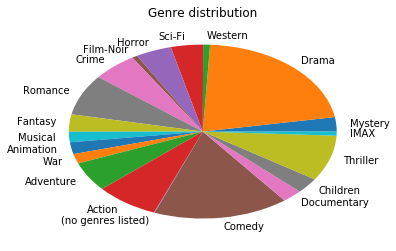

In [218]:
# now let's plot the genres distribution as a bar chart and visualize it

# introducing the matplotlib package which lets us plot charts, graphs in Python
%matplotlib inline
import matplotlib.pyplot as plt

# now lets plot this genre distribution as a pie chart
plt.pie(genre_counter.values(), labels=genre_counter.keys())
plt.title('Genre distribution')
plt.show()

[]

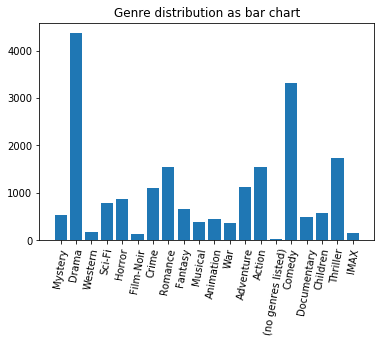

In [219]:
# we can also plot a bar chart (with grid lines and slanted x axis labels for better readability)
x = list(range(len(genre_counter)))
plt.xticks(x, genre_counter.keys(), rotation=80)
plt.bar(x, genre_counter.values())
plt.title('Genre distribution as bar chart')
plt.plot()

In [220]:
# Lets find masala movies to watch, as we all love masala :)
# Real masala movies has Action and Romance and Comedy and Thriller :)
masala_genres = ['Romance','Comedy', 'Action', 'Thriller']
masala_lambda = lambda x: set(masala_genres).issubset(x['genres_arr'])
masala_movies = movies_df[movies_df.apply(masala_lambda, axis='columns')]
masala_movies

,movieId,title,genres,genres_arr
344,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
1974,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
3699,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...,"[Action, Animation, Comedy, Crime, Drama, Roma..."
3842,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,"[Action, Adventure, Comedy, Drama, Romance, Th..."
4702,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
6193,34435,Sholay (1975),Action|Adventure|Comedy|Musical|Romance|Thriller,"[Action, Adventure, Comedy, Musical, Romance, ..."


In [221]:
# now let's do the 5 point summary of ratings attribute

# read the ratings.csv file and create a Pandas DataFrame called movies_df
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [222]:
# lets find out all values ratings users can give to movies
unique_ratings = ratings_df['rating'].unique()
unique_ratings.sort()
print(unique_ratings)

[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [223]:
# now lets find out number of ratings and number of users who have given those ratings

print('#ratings %d' % len(ratings_df.index))
print('#users %d' % len(ratings_df['userId'].unique()))

#ratings 100004
#users 671


In [224]:
# introducing the numpy package which is used to find various stats out of data
import numpy as np

# 5 point summary of ratings
print('min: %.1f' % np.min(ratings_df.rating))
print('25 percentile: %.1f' % np.percentile(ratings_df.rating, 25))
print('median: %.1f' % np.median(ratings_df['rating']))
print('75 percentile: %.1f' % np.percentile(ratings_df.rating, 75))
print('max: %.1f' % np.max(ratings_df.rating))

min: 0.5
25 percentile: 3.0
median: 4.0
75 percentile: 4.0
max: 5.0


In [225]:
# now lets see how many movies have got each of these ratings

ratings_df['rating'].value_counts()

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

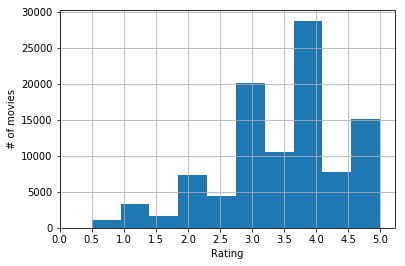

In [226]:
# now lets plot a histogram of movie ratings to get an overall picture
plt.hist(ratings_df.rating)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.ylabel('# of movies')
plt.grid()
plt.show()

In [227]:
# now lets find the highest rated movies (movies with highest average rating)
ratings_df.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [228]:
# create a dataframe with just movieId and rating attributes
ratings_view = ratings_df[['movieId', 'rating']]
ratings_view.groupby(['movieId'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,rating
9065,163949,5.0
7297,71180,5.0
6629,51471,5.0
6662,52617,5.0
6704,53887,5.0
6717,54251,5.0
6726,54328,5.0
6785,55555,5.0
6836,56869,5.0
6843,57038,5.0


In [229]:
# but which movies are these, we want their names as well

# now lets merge/join the movies_df and ratings_df so that we can see the actual movie titles of top 10 movies
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,[Drama]
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,[Drama]
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,[Drama]
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,[Drama]
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,[Drama]


In [230]:
# create a dataframe with just movieId and rating attributes
ratings_view = merged_df[['movieId', 'rating', 'title']]
ratings_view.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,title,rating
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,5.0
7297,71180,Padre padrone (1977),5.0
6629,51471,Amazing Grace (2006),5.0
6662,52617,Woman on the Beach (Haebyeonui yeoin) (2006),5.0
6704,53887,O Lucky Man! (1973),5.0
6717,54251,Dorian Blues (2004),5.0
6726,54328,My Best Friend (Mon meilleur ami) (2006),5.0
6785,55555,"Edge of Heaven, The (Auf der anderen Seite) (2...",5.0
6836,56869,Drained (O cheiro do Ralo) (2006),5.0
6843,57038,To the Left of the Father (Lavoura Arcaica) (2...,5.0


In [231]:
# but these are surely not the top rated movies we would expect there must be a problem

# lets check how many ratings have these movies received, lets take an example of movieId 163949
len(merged_df[merged_df['movieId'] == 163949].index)

1

In [232]:
# now lets only consider movies which have atleast 100 ratings and see how the top 10 movies change
temp_df = ratings_view.groupby(['movieId', 'title'], as_index=False).count()
well_rated_df = temp_df[temp_df.apply(lambda x: x['rating'] > 100, axis='columns')]

well_rated_df.head()

,movieId,title,rating
0,1,Toy Story (1995),247
1,2,Jumanji (1995),107
5,6,Heat (1995),104
9,10,GoldenEye (1995),122
24,25,Leaving Las Vegas (1995),101


In [233]:
final_df = pd.merge(merged_df, well_rated_df, how='inner', on=['movieId'])
final_df.head()

,userId,movieId,rating_x,timestamp,title_x,genres,genres_arr,title_y,rating_y
0,2,10,4.0,835355493,GoldenEye (1995),Action|Adventure|Thriller,"[Action, Adventure, Thriller]",GoldenEye (1995),122
1,4,10,4.0,949810645,GoldenEye (1995),Action|Adventure|Thriller,"[Action, Adventure, Thriller]",GoldenEye (1995),122
2,7,10,3.0,851869035,GoldenEye (1995),Action|Adventure|Thriller,"[Action, Adventure, Thriller]",GoldenEye (1995),122
3,15,10,3.0,1093028290,GoldenEye (1995),Action|Adventure|Thriller,"[Action, Adventure, Thriller]",GoldenEye (1995),122
4,19,10,3.0,855192496,GoldenEye (1995),Action|Adventure|Thriller,"[Action, Adventure, Thriller]",GoldenEye (1995),122


In [235]:
ratings_view = final_df[['movieId', 'rating_x', 'title_x']]
x = ratings_view.groupby(['movieId', 'title_x'], as_index=False).mean().sort_values(by='rating_x', ascending=False)
x.head(10)

,movieId,title_x,rating_x
62,858,"Godfather, The (1972)",4.487500
27,318,"Shawshank Redemption, The (1994)",4.487138
81,1221,"Godfather: Part II, The (1974)",4.385185
10,50,"Usual Suspects, The (1995)",4.370647
43,527,Schindler's List (1993),4.303279
71,1193,One Flew Over the Cuckoo's Nest (1975),4.256944
55,608,Fargo (1996),4.256696
25,296,Pulp Fiction (1994),4.256173
117,2858,American Beauty (1999),4.236364
147,58559,"Dark Knight, The (2008)",4.235537
